In [1]:
#It is just a demonstration on how to use madrin
#Try to experiment with learning rate, epochs, activation functions,...

In [2]:
!pip install madrin

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import madrin as mad

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [6]:
#Creating the model using Network class of madrin
model=mad.Network([
    mad.Linear(100, 784, gain=1.414213562), mad.Relu(),
    mad.Linear(100,100, gain=1.414213562), mad.Relu(),
    mad.Linear(10,100, gain=0.001), mad.Softmax()
])

In [7]:
#Compile the model(Just specify the loss and learning_rate to be used)
model.compile(loss="categorical_crossentropy", lr=0.00005)

In [8]:
#Train the model
model.fit(x_train,y_train,epochs=150,batch_size=6000,track_loss=True)

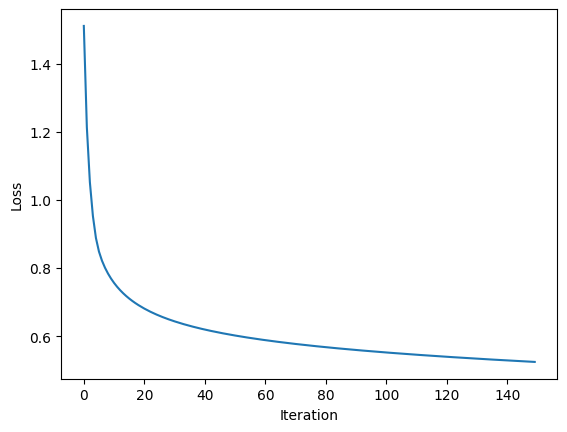

In [9]:
#Plot the loss with each epoch
plt.plot(np.arange(len(model.costs)),model.costs)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

In [10]:
#Check Accuracy on test set
y_predict = model.forward(x_test)
predict = np.argmax(y_predict,axis=1)

count=0
for j in range(len(y_test)):
    if predict[j]==y_test[j]:
        count+=1
print(f"Accuracy: {(count / len(y_test))*100}%")

Accuracy: 84.13000000000001%
